In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
import statsmodels


def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        


def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected



def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista



def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

# Load alignment files for each recording

word_analysis = []
path = os.listdir("/export/b15/afavaro/Frontiers/GITA_NEW_TASKS/Alignment/")
print(len(path))
for elem in path:
        word_analysis.append(os.path.join('/export/b15/afavaro/Frontiers/GITA_NEW_TASKS/Alignment/', elem))



list_of_dataframes = []
for element in word_analysis:
    participant = pd.read_csv(element)
    elem = os.path.basename(element)
    total = elem.split(".csv")[0]
    name = elem.split('_', 1)[1]
    name = name.split("_")[0]
    label = elem.split("_")[0]
    task = (elem.split("_", 1)[1])
    task= task.split("_", -1)[1]
    #task = task[:-4]
    
   # rt = participant.Time.tolist()[0]
    tot= participant.time_stamp.tolist()
    tot = (list(set(tot)))
    unique = participant['time_stamp'].unique()
    stdx = unique.std()
    kurtx = kurtosis(unique)
    skewx =  skew(unique)
    dict = {'total': total, 'name': name, 'label': label, 'tasks': task, 'rhythm_std': stdx,'rhythm_skew': skewx, 'rhythm_kurt': kurtx} # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(dict, index=[0])
    list_of_dataframes.append(df)

data_ = pd.concat(list_of_dataframes, ignore_index=True)
data_ = data_.dropna()


data_['task']=[elem.split("_")[2] for elem in data_['total'].tolist()]
task_grouped_= data_.groupby('tasks')
read = task_grouped_.get_group("readtext.csv")
luisa = task_grouped_.get_group("luisa.csv")
loslibros = task_grouped_.get_group("loslibros.csv")
micasa = task_grouped_.get_group("micasa.csv")
rosita = task_grouped_.get_group("rosita.csv")
laura = task_grouped_.get_group("laura.csv")
monog= task_grouped_.get_group("monologue")
TDU = pd.concat([luisa, loslibros, rosita,monog,laura ])

# Read text
grouped = read.groupby('label')
control = grouped.get_group('HC') 
parkinson = grouped.get_group("PD")
task = read.columns[4:-1].values.tolist()
parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(read.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[4:-1])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_read.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")

# Apply Benjamini-Hochberg correction

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_read.txt')
holm_correction(kruskal_1)


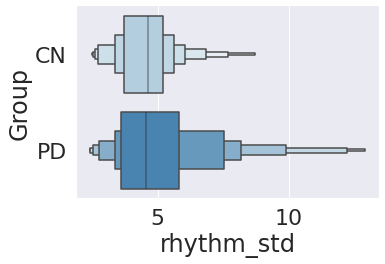

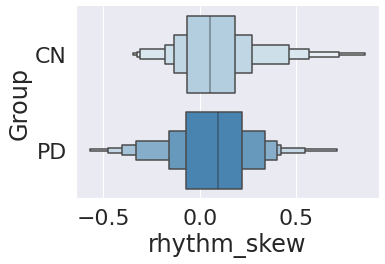

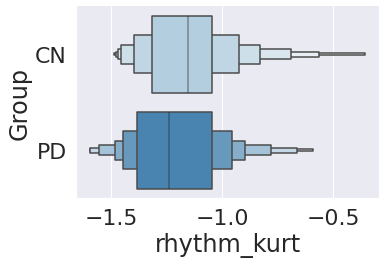

In [60]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista}
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\


## Monologue

grouped = monog.groupby('label')
control = grouped.get_group('CN') 
parkinson = grouped.get_group("PD")
task = monog.columns[4:-1].values.tolist()
parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(monog.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(monog.columns[4:-1])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm.txt')
holm_correction(kruskal_1)

# Plot

for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    {nome: data, 'Group': lista}
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)


## Text Dependent Utterances (TDU)

grouped = TDU.groupby('label')
control = grouped.get_group('CN') 
parkinson = grouped.get_group("PD")
task = TDU.columns[4:-1].values.tolist()
parkinson_all_feat = np.array([parkinson[feat] for feat in np.array(TDU.columns[4:-1])])
control_all_feat = np.array([control[feat] for feat in np.array(TDU.columns[4:-1])])


#Compute statistics

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_TDU.txt', 'w') as f:
 
    kruskal(f, task, parkinson_all_feat, control_all_feat, "controls vs.", "parkinson")


# Apply Benjamini-Hochberg correction

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/cognitive/rhythm_TDU.txt')
holm_correction(kruskal_1)

# Plot

for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista}
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)